In [1]:
import numpy as np
import xarray as xr
# our local module:
import sys
p = '/global/homes/q/qnicolas'
if p not in sys.path:
    sys.path.append(p)
import tools.wavenumber_frequency_functions as wf
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

def wf_analysis(x, **kwargs):
    """Return normalized spectra of x using standard processing parameters."""
    # Get the "raw" spectral power
    # OPTIONAL kwargs: 
    # segsize, noverlap, spd, latitude_bounds (tuple: (south, north)), dosymmetries, rmvLowFrq

    z2 = wf.spacetime_power(x, **kwargs)
    z2avg = z2.mean(dim='component')
    z2.loc[{'frequency':0}] = np.nan # get rid of spurious power at \nu = 0
    # the background is supposed to be derived from both symmetric & antisymmetric
    background = wf.smooth_wavefreq(z2avg, kern=wf.simple_smooth_kernel(), nsmooth=50, freq_name='frequency')
    # separate components
    z2_sym = z2[0,...]
    z2_asy = z2[1,...]
    # normalize
    nspec_sym = z2_sym / background 
    nspec_asy = z2_asy / background
    return nspec_sym, nspec_asy


def plot_normalized_symmetric_spectrum(s, ofil=None):
    """Basic plot of normalized symmetric power spectrum with shallow water curves."""
    fb = [0, .8]  # frequency bounds for plot
    # get data for dispersion curves:
    swfreq,swwn = wf.genDispersionCurves()
    # swfreq.shape # -->(6, 3, 50)
    swf = np.where(swfreq == 1e20, np.nan, swfreq)
    swk = np.where(swwn == 1e20, np.nan, swwn)

    fig, ax = plt.subplots()
    c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
    z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
    z.loc[{'frequency':0}] = np.nan
    kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
    img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 3.0, 16), cmap='Spectral_r',  extend='both')
    for ii in range(3,6):
        ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
        ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
        ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
    ax.axvline(0, linestyle='dashed', color='lightgray')
    ax.set_xlim([-15,15])
    ax.set_ylim(fb)    
    ax.set_title("Normalized Symmetric Component")
    fig.colorbar(img)
    if ofil is not None:
        fig.savefig(ofil, bbox_inches='tight', dpi=144)


def plot_normalized_asymmetric_spectrum(s, ofil=None):
    """Basic plot of normalized symmetric power spectrum with shallow water curves."""

    fb = [0, .8]  # frequency bounds for plot
    # get data for dispersion curves:
    swfreq,swwn = wf.genDispersionCurves()
    # swfreq.shape # -->(6, 3, 50)
    swf = np.where(swfreq == 1e20, np.nan, swfreq)
    swk = np.where(swwn == 1e20, np.nan, swwn)

    fig, ax = plt.subplots()
    c = 'darkgray' # COLOR FOR DISPERSION LINES/LABELS
    z = s.transpose().sel(frequency=slice(*fb), wavenumber=slice(-15,15))
    z.loc[{'frequency':0}] = np.nan
    kmesh0, vmesh0 = np.meshgrid(z['wavenumber'], z['frequency'])
    img = ax.contourf(kmesh0, vmesh0, z, levels=np.linspace(0.2, 1.8, 16), cmap='Spectral_r', extend='both')
    for ii in range(0,3):
        ax.plot(swk[ii, 0,:], swf[ii,0,:], color=c)
        ax.plot(swk[ii, 1,:], swf[ii,1,:], color=c)
        ax.plot(swk[ii, 2,:], swf[ii,2,:], color=c)
    ax.axvline(0, linestyle='dashed', color='lightgray')
    ax.set_xlim([-15,15])
    ax.set_ylim(fb)
    ax.set_title("Normalized Anti-symmetric Component")
    fig.colorbar(img)
    if ofil is not None:
        fig.savefig(ofil, bbox_inches='tight', dpi=144)

#
# LOAD DATA, x = DataArray(time, lat, lon), e.g., daily mean precipitation
#
def get_data(filename, variablename):
    try: 
        ds = xr.open_dataset(filename)
    except ValueError:
        ds = xr.open_dataset(filename, decode_times=False)
    
    return ds[variablename]

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 0-0-0 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0000-0-0 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
INFO:root:Data reduced by latitude bounds. Size is Frozen({'time': 730, 'lat': 13, 'lon': 144})


2023-07-25 05:26:29,658 root 0/1 INFO :: Data reduced by latitude bounds. Size is Frozen({'time': 730, 'lat': 13, 'lon': 144})


DEBUG:root:[spacetime_power] x_win shape is (5, 13, 144, 192)
INFO:root:No missing, so use simplest segment detrend.


2023-07-25 05:26:29,760 root 0/1 INFO :: No missing, so use simplest segment detrend.


DEBUG:root:[Hayashi] nDayWin: 96, spd: 2
INFO:root:[Hayashi] input dims is ('time', 'lat', 'wavenumber', 'frequency'), (5, 13, 144, 192)


2023-07-25 05:26:29,829 root 0/1 INFO :: [Hayashi] input dims is ('time', 'lat', 'wavenumber', 'frequency'), (5, 13, 144, 192)


INFO:root:[Hayashi] input coords is Coordinates:
  * time        (time) float32 95.5 159.0 222.5 286.0 349.5
  * lat         (lat) float32 -15.0 -12.5 -10.0 -7.5 -5.0 ... 7.5 10.0 12.5 15.0
  * wavenumber  (wavenumber) float64 0.0 1.0 2.0 3.0 4.0 ... -4.0 -3.0 -2.0 -1.0
  * frequency   (frequency) float64 0.0 0.01042 0.02083 ... -0.02083 -0.01042


2023-07-25 05:26:29,831 root 0/1 INFO :: [Hayashi] input coords is Coordinates:
  * time        (time) float32 95.5 159.0 222.5 286.0 349.5
  * lat         (lat) float32 -15.0 -12.5 -10.0 -7.5 -5.0 ... 7.5 10.0 12.5 15.0
  * wavenumber  (wavenumber) float64 0.0 1.0 2.0 3.0 4.0 ... -4.0 -3.0 -2.0 -1.0
  * frequency   (frequency) float64 0.0 0.01042 0.02083 ... -0.02083 -0.01042


DEBUG:root:[Hayashi] The nshape ends up being [5, 13, 145, 193]
DEBUG:root:allocate the re-ordered array
DEBUG:root:[Hayashi] Assign values into array. Notable numbers: mlon//2=72, N//2=96
DEBUG:root:calculate power


(5, 13, 145, 193)


DEBUG:root:put into DataArray
DEBUG:root:[hayashi] working on coordinate time
DEBUG:root:[hayashi] working on coordinate lat
DEBUG:root:[hayashi] working on coordinate wavenumber
DEBUG:root:[hayashi] working on coordinate frequency


freq size is (193,).


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f8d7822eb50>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f8d6ebb6a90>


CPU times: user 1.11 s, sys: 619 ms, total: 1.73 s
Wall time: 1.09 s


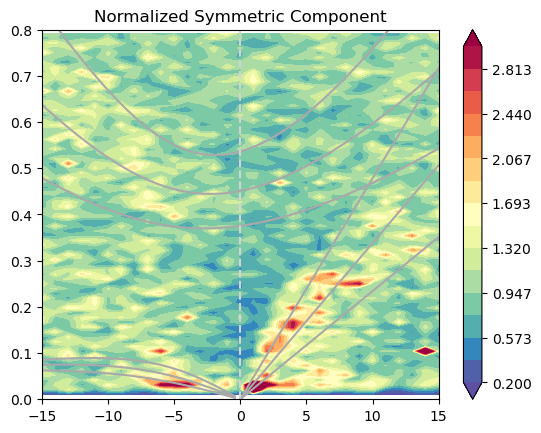

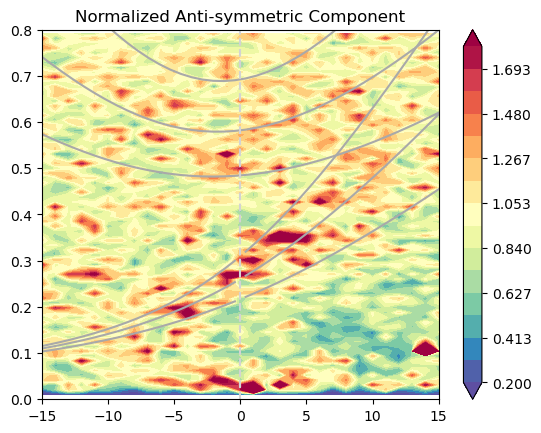

In [7]:
%%time
# input file -- could make this a CLI argument
#
fili = "OLR.12hr_2yrs.wheeler.nc" 
vari = "olr"
#
# Loading data ... example is very simple
#
data = get_data(fili, vari)  # returns OLR

#
# Options ... right now these only go into wk.spacetime_power()
#
latBound = (-15,15)  # latitude bounds for analysis
spd      = 2    # SAMPLES PER DAY
nDayWin  = 96   # Wheeler-Kiladis [WK] temporal window length (days)
nDaySkip = -65  # time (days) between temporal windows [segments]
                # negative means there will be overlapping temporal segments
twoMonthOverlap = 65
opt      = {'segsize': nDayWin, 
            'noverlap': twoMonthOverlap, 
            'spd': spd, 
            'latitude_bounds': latBound, 
            'dosymmetries': True, 
            'rmvLowFrq':True}
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    # in this example, the smoothing & normalization will happen and use defaults
    symComponent, asymComponent = wf_analysis(data, **opt)
    #
    # Plots ... sort of matching NCL, but not worrying much about customizing.
    #
    outPlotName = "example_symmetric_plot.png"
    plot_normalized_symmetric_spectrum(symComponent, outPlotName)
    
    outPlotName = "example_asymmetric_plot.png"
    plot_normalized_asymmetric_spectrum(asymComponent, outPlotName)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f8d6da25a90>


(-15.0, 15.0)

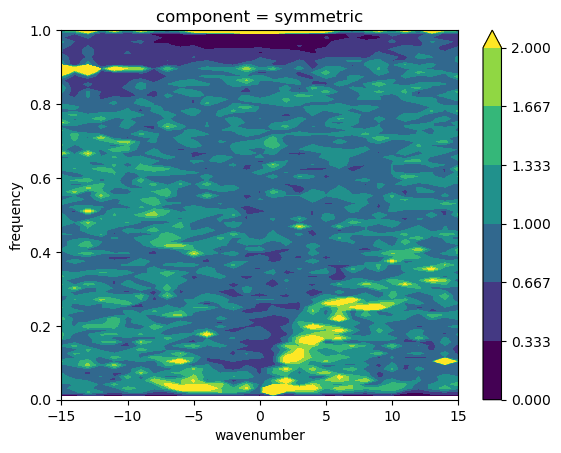

In [27]:
symComponent.sel(frequency = (symComponent.frequency >=0)).plot.contourf(x='wavenumber',vmin=0,vmax=2)
plt.xlim(-15,15)